## Let's Import all the basic Libraries 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing the data from trusted site like yahoo finance  

In [9]:
import yfinance as stocks_data
ticker = input("Inter the Symbol: ")
stock_data = stocks_data.Ticker(ticker)
df = stock_data.history(period="MAX")
df.to_csv('./data/stock_'+str(ticker)+'.csv',index=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,176.149994,176.899994,173.789993,175.100006,81510100,0.0,0.0
2024-03-05 00:00:00-05:00,170.759995,172.039993,169.619995,170.119995,95132400,0.0,0.0
2024-03-06 00:00:00-05:00,171.059998,171.240005,168.679993,169.119995,68587700,0.0,0.0


In [10]:
close_data = df.reset_index()['Close']
close_data.shape

(10900,)

<Axes: >

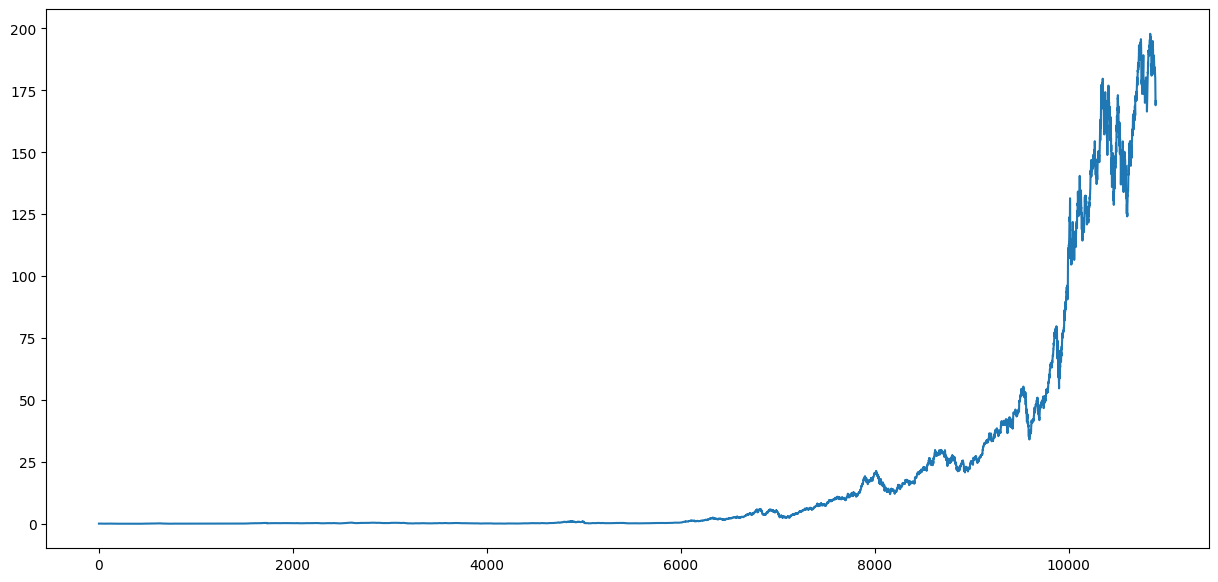

In [11]:
close_data.plot(figsize=(15,7))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
close_data=scaler.fit_transform(np.array(close_data).reshape(-1,1))

In [13]:
close_data.shape

(10900, 1)

In [14]:
training_size = int(len(close_data)*0.7)
test_size = len(close_data)-training_size
train_data , test_data = close_data[0:training_size,:],close_data[training_size:len(close_data),:]
train_data.shape ,test_data.shape

((7629, 1), (3271, 1))

In [15]:
def create_dataset(dataset,context_window=1):
    x_data,y_data = [],[]
    for i in range(len(dataset)-context_window-1):
        a=dataset[i:(i+context_window),0]
        x_data.append(a)
        y_data.append(dataset[i + context_window,0])
    return np.array(x_data),np.array(y_data)

In [16]:
context_window=int(input())
x_train,y_train = create_dataset(train_data,context_window)
x_test,y_test = create_dataset(test_data,context_window)

In [17]:
# for train and validation data
from sklearn.model_selection import train_test_split as tts 
x_train,x_val,y_train,y_val=tts(x_train,y_train,train_size=0.8)

In [18]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(6099, 4) (6099,)
(1525, 4) (1525,)
(3266, 4) (3266,)


In [19]:
test_df = pd.DataFrame(x_test)
test_df['output'] = y_test
test_df.head()

,0,1,2,3,output
0,0.052795,0.053608,0.053848,0.052605,0.050248
1,0.053608,0.053848,0.052605,0.050248,0.050956
2,0.053848,0.052605,0.050248,0.050956,0.050349
3,0.052605,0.050248,0.050956,0.050349,0.051668
4,0.050248,0.050956,0.050349,0.051668,0.051959


In [20]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [21]:
x_test

array([[[0.05279486],
        [0.05360799],
        [0.05384797],
        [0.05260535]],

       [[0.05360799],
        [0.05384797],
        [0.05260535],
        [0.05024846]],

       [[0.05384797],
        [0.05260535],
        [0.05024846],
        [0.05095615]],

       ...,

       [[0.91690645],
        [0.91351954],
        [0.90800948],
        [0.88495819]],

       [[0.91351954],
        [0.90800948],
        [0.88495819],
        [0.85978368]],

       [[0.90800948],
        [0.88495819],
        [0.85978368],
        [0.85472857]]])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [23]:
model = Sequential()
model.add(GRU(50,return_sequences=True,input_shape=(100,1)))
model.add(GRU(50,return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Stock Price Prediction\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 7.5467e-05 - val_loss: 2.3308e-07
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4120e-07 - val_loss: 2.8036e-07
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6802e-07 - val_loss: 1.4804e-07
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4498e-07 - val_loss: 5.9747e-07
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4784e-07 - val_loss: 1.5010e-07
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3444e-07 - val_loss: 2.2510e-07
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2672e-07 - val_loss: 8.1344e-07
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4243e-07 - val_loss: 1.1248e-07
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2230e-07 - val_loss: 2.8187e-07
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9025e-07 - val_loss: 2.3198e-07
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 

In [26]:
model.save('./models/'+str(context_window)+'_model_'+str(ticker)+'.h5')


In [27]:
x_test[0]

array([[0.05279486],
       [0.05360799],
       [0.05384797],
       [0.05260535]])

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
val_predict=model.predict(x_val)

191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
test_predict.shape

(3266, 1)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)


In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print('RMSE train: ',math.sqrt(mean_squared_error(y_train,train_predict)))
print('RMSE test: ',math.sqrt(mean_squared_error(y_test,test_predict)))

RMSE train:  2.172412543719062
RMSE test:  74.03684357892865


In [32]:
df.index[context_window:training_size-1]

DatetimeIndex(['1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               '1980-12-29 00:00:00-05:00', '1980-12-30 00:00:00-05:00',
               '1980-12-31 00:00:00-05:00', '1981-01-02 00:00:00-05:00',
               ...
               '2011-02-23 00:00:00-05:00', '2011-02-24 00:00:00-05:00',
               '2011-02-25 00:00:00-05:00', '2011-02-28 00:00:00-05:00',
               '2011-03-01 00:00:00-05:00', '2011-03-02 00:00:00-05:00',
               '2011-03-03 00:00:00-05:00', '2011-03-04 00:00:00-05:00',
               '2011-03-07 00:00:00-05:00', '2011-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=7624, freq=None)

In [33]:
x_train.shape

(6099, 4, 1)

In [34]:
pred_df_train = pd.DataFrame(scaler.inverse_transform(x_train.reshape(-1,x_train.shape[1])),index=df.index[context_window:training_size-len(x_val)-1])
pred_df_train['Output']=scaler.inverse_transform(y_train.reshape(-1,1))
pred_df_train['Output_pred']=train_predict

pred_df_val = pd.DataFrame(scaler.inverse_transform(x_val.reshape(-1,x_val.shape[1])),index=df.index[training_size-len(x_val)-1:training_size-1])
pred_df_val['Output']=scaler.inverse_transform(y_val.reshape(-1,1))
pred_df_val['Output_pred']=val_predict

pred_df_test = pd.DataFrame(scaler.inverse_transform(x_test.reshape(-1,x_test.shape[1])),index=df.index[training_size+context_window+1:])
pred_df_test['Output']=scaler.inverse_transform(y_test.reshape(-1,1))
pred_df_test['Output_pred']=test_predict
pred_df = pd.concat([pred_df_train,pred_df_val, pred_df_test], ignore_index=False)
pred_df

,0,1,2,3,Output,Output_pred
Date,,,,,,
1980-12-18 00:00:00-05:00,0.232148,0.233991,0.232148,0.237675,0.237675,0.305987
1980-12-19 00:00:00-05:00,9.314106,9.307452,9.229146,9.100338,9.197094,9.120582
1980-12-22 00:00:00-05:00,0.521273,0.501568,0.512316,0.497090,0.501568,0.570487
1980-12-23 00:00:00-05:00,0.439261,0.448298,0.450106,0.450106,0.453722,0.516778
1980-12-24 00:00:00-05:00,0.335327,0.336270,0.338154,0.332501,0.337212,0.404312
...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,181.160004,182.630005,181.419998,180.750000,179.660004,147.676071
2024-03-05 00:00:00-05:00,182.630005,181.419998,180.750000,179.660004,175.100006,147.248169
2024-03-06 00:00:00-05:00,181.419998,180.750000,179.660004,175.100006,170.119995,145.869980


<Axes: xlabel='Date'>

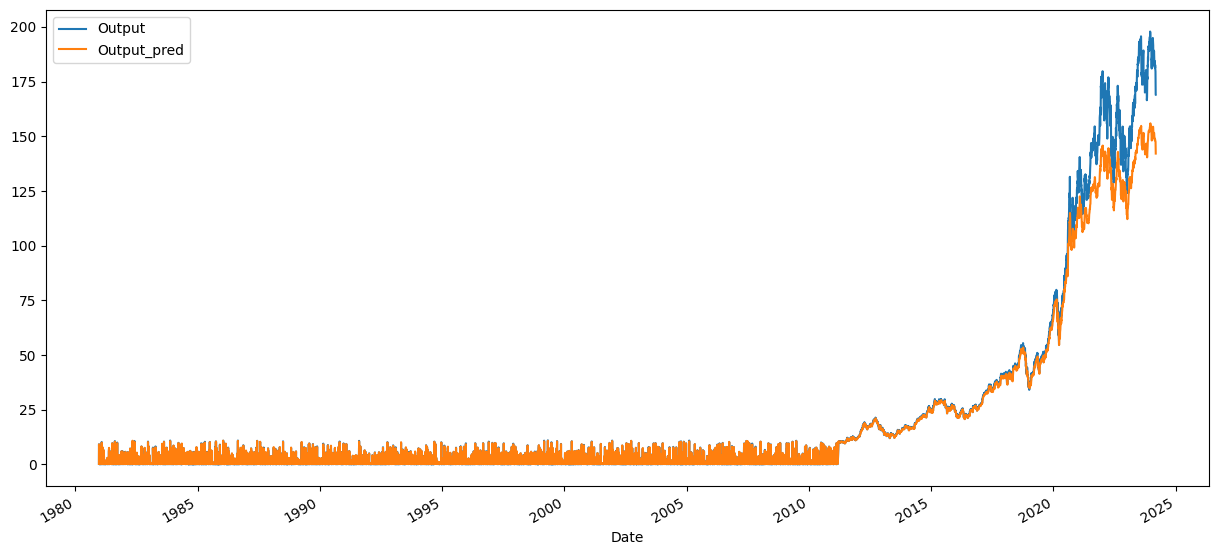

In [35]:
pred_df[['Output','Output_pred']].plot(figsize=(15,7))

In [ ]:
# I have writen some comment